<a href="https://colab.research.google.com/github/RufinoMartin/DataScience2021/blob/main/Notebook_Integrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook de Integracion de 3 dataframes previamente elaborados:

- df_Restricciones_Covid
- df_Indices_Commodities
- df_Indices_Bursatiles

Se generará a partir de ellos un unico Dataframe, se realizarán analisis multivariados y a partir de los hallazgos se consolidará la hipotesis de trabajo. 


In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import pandas_profiling
from pandas_profiling import ProfileReport
from functools import reduce
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Por el gran tamaño de los datasets, se ha realizado una digestion previa de los mismos. 

Para acceder a los notebooks preliminares donde se realizó dicha labor:

 https://github.com/RufinoMartin/DataScience2021
 
 El resultado de la misma han sido tres archivos, que procedemos a importar, y que de no funcionar el pd.read, se encuentran disponibles con la terminacion de "_Final.csv" en el repositorio. Copiar el URL del Raw, y pegar:
 

In [ ]:
df_Restricciones_Covid = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/DataScience2021/main/Restricciones_Covid_Final.csv?token=GHSAT0AAAAAABRYGSF3QSSV3QKHVK26NKLUYRXTDYQ')
df_Indices_Commodities = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/DataScience2021/main/Indices_Commodities_Final.csv?token=GHSAT0AAAAAABRYGSF3XIZWA6IJGQ46UXJSYRXTDQQ')
df_Indices_Bursatiles = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/DataScience2021/main/Indices_Bursatiles_Final.csv?token=GHSAT0AAAAAABRYGSF2FIF6YPR3AGUOOJJWYRXTDGA')

Indices utilizados:

DOLAR : "DYX" (The U.S. Dollar Index is used to measure the value of the dollar against a basket of six world currencies: Euro, Swiss Franc, Japanese Yen, Canadian dollar, British pound, and Swedish Krona)

USA : "S&P500" ("Standard and Poor 500" is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States)

CHINA: "SHA" (The Shanghai Stock Exchange is one of the three stock exchanges operating independently in mainland China. The Shanghai Stock Exchange is the world's 3rd largest stock market by market capitalization at US$7.62 trillion as of July 2021)

EUROPA :

"UKX" (The "FTSE 100 Index" The Financial Times Stock Exchange 100 Index, is a share index of the 100 companies listed on the London Stock Exchange with the highest market capitalisation.

"SX5P" (The STOXX Europe 50 index provides a blue-chip representation of supersector leaders in Europe covering almost 50% of the free-float market capitalization of the European stock market.)

- Indices de Comoddities Desarrollados por el Fondo Monetario Internacional:
 
 Alimentos,	Industrial,	Agro,	Metales, Energia y Promedio.

In [ ]:
# Exploracion basica de cada Dataframe

In [ ]:
#Probamos unir los dataframes

dfs = [df_Restricciones_Covid, df_Indices_Commodities, df_Indices_Bursatiles]

In [ ]:
df_Integrado = reduce(lambda  left,right: pd.merge(left,right,on=['DateTime'],
                                            how='outer'), dfs).fillna('0')

In [ ]:
df_Integrado.drop(columns={'Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0'}, inplace=True)

In [ ]:
df_Integrado.rename(columns={'Promedio': 'Promedio Commodities'}, inplace=True)

In [ ]:
df_Integrado = df_Integrado.sort_values(by=['DateTime'])

In [ ]:
df_Integrado = df_Integrado.reset_index(drop=True)

El merge modificó los tipo de objeto. Procedemos a devolver a cada columna su tipo deseado.

In [ ]:
df_Integrado[["StringencyIndex", "ContainmentHealthIndex", "EconomicSupportIndex" , "GovernmentResponseIndex", 
              "Alimentos","Industrial", "Agro", "Metales", "Energia", "Promedio Commodities"]] = df_Integrado[["StringencyIndex", "ContainmentHealthIndex", "EconomicSupportIndex" , "GovernmentResponseIndex", 
              "Alimentos","Industrial", "Agro", "Metales", "Energia", "Promedio Commodities"]].apply(pd.to_numeric)

In [ ]:
df_Integrado["CountryName"] = df_Integrado["CountryName"].astype(str)

In [ ]:
df_Integrado["DateTime"] = pd.to_datetime(df_Integrado["DateTime"])

In [ ]:
df_Integrado.dtypes

CountryName                        object
DateTime                   datetime64[ns]
StringencyIndex                   float64
ContainmentHealthIndex            float64
EconomicSupportIndex              float64
GovernmentResponseIndex           float64
Alimentos                         float64
Industrial                        float64
Agro                              float64
Metales                           float64
Energia                           float64
Promedio Commodities              float64
$DYX                              float64
$S&P500                           float64
$SHA                              float64
$UKX                              float64
$SX5P                             float64
dtype: object

In [ ]:
df_Integrado.head(5)

,CountryName,DateTime,StringencyIndex,ContainmentHealthIndex,EconomicSupportIndex,GovernmentResponseIndex,Alimentos,Industrial,Agro,Metales,Energia,Promedio Commodities,$DYX,$S&P500,$SHA,$UKX,$SX5P
0,0,2019-01-01,0.0,0.0,0.0,0.0,100.466542,118.836909,103.536150,114.711385,133.302098,117.078244,95.58,2704.10,2584.57,6968.85,2897.13
1,0,2019-02-01,0.0,0.0,0.0,0.0,98.772205,125.808562,103.608780,120.811052,136.048817,119.011525,96.16,2709.80,2940.95,7074.73,3029.67
2,0,2019-03-01,0.0,0.0,0.0,0.0,98.063110,127.539176,105.409046,121.105733,138.256367,119.910036,97.28,2834.40,3090.76,7279.19,3117.01
3,0,2019-04-01,0.0,0.0,0.0,0.0,101.569201,129.656529,104.681017,121.924057,143.768294,123.416731,97.48,2945.83,3078.34,7418.22,3199.51
4,0,2019-05-01,0.0,0.0,0.0,0.0,98.094289,129.330578,105.436360,121.161561,139.410557,120.477541,97.61,2752.06,2898.70,7161.71,3042.89


In [ ]:
df_Integrado.info

<bound method DataFrame.info of      CountryName   DateTime  StringencyIndex  ContainmentHealthIndex  EconomicSupportIndex  GovernmentResponseIndex   Alimentos  Industrial        Agro     Metales     Energia  Promedio Commodities   $DYX  $S&P500     $SHA     $UKX    $SX5P
0              0 2019-01-01             0.00                    0.00                   0.0                     0.00  100.466542  118.836909  103.536150  114.711385  133.302098            117.078244  95.58  2704.10  2584.57  6968.85  2897.13
1              0 2019-02-01             0.00                    0.00                   0.0                     0.00   98.772205  125.808562  103.608780  120.811052  136.048817            119.011525  96.16  2709.80  2940.95  7074.73  3029.67
2              0 2019-03-01             0.00                    0.00                   0.0                     0.00   98.063110  127.539176  105.409046  121.105733  138.256367            119.910036  97.28  2834.40  3090.76  7279.19  3117.01
3   

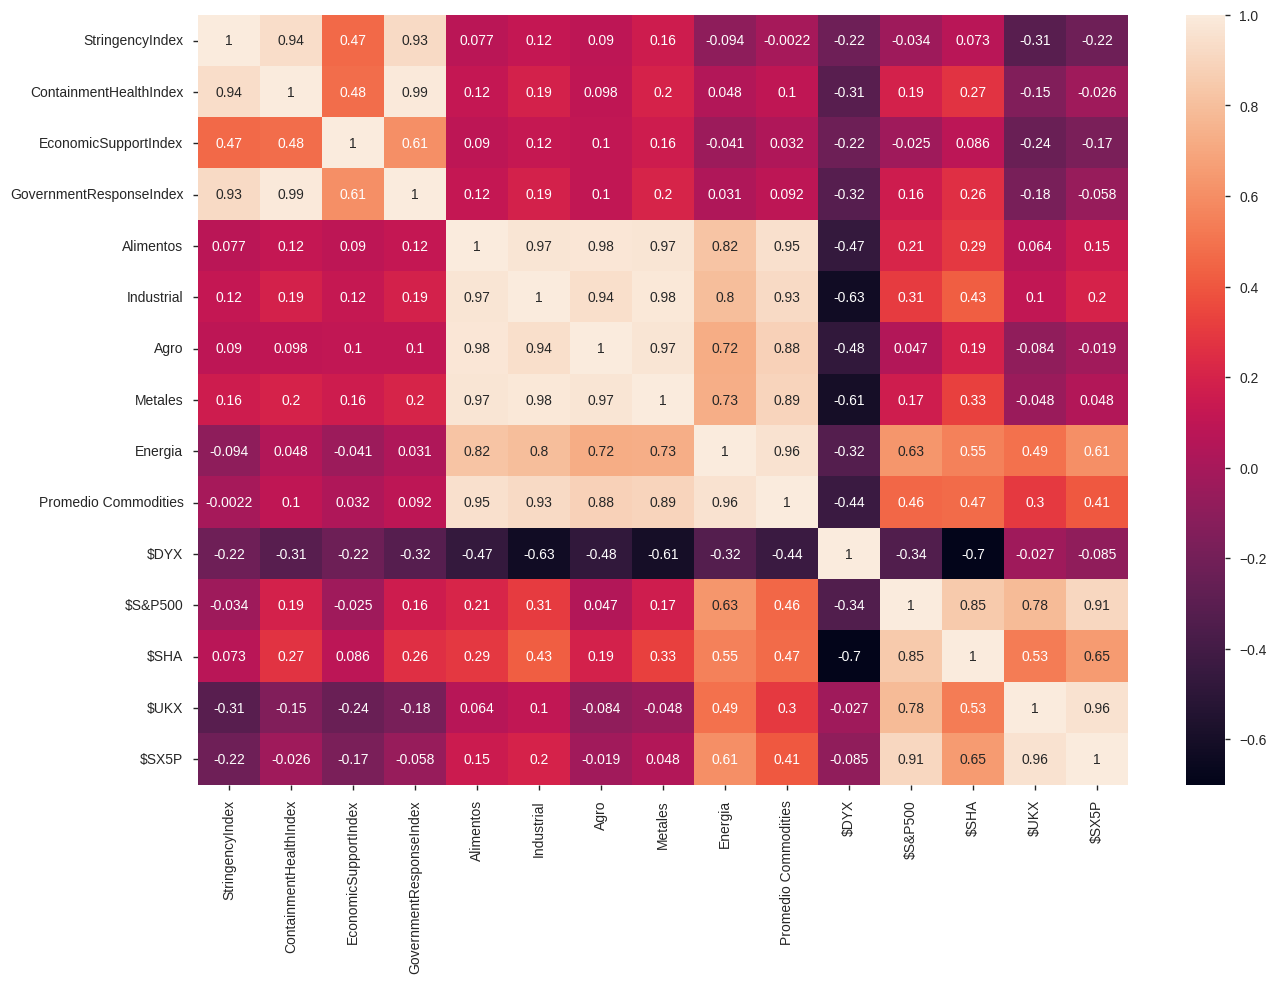

In [ ]:
#Correlaciones de Heatmap

plt.figure(figsize=(15, 10))

heatmap_test = df_Integrado.corr()
sns.heatmap(heatmap_test, 
            xticklabels = heatmap_test.columns.values,
            yticklabels = heatmap_test.columns.values,
            annot = True);

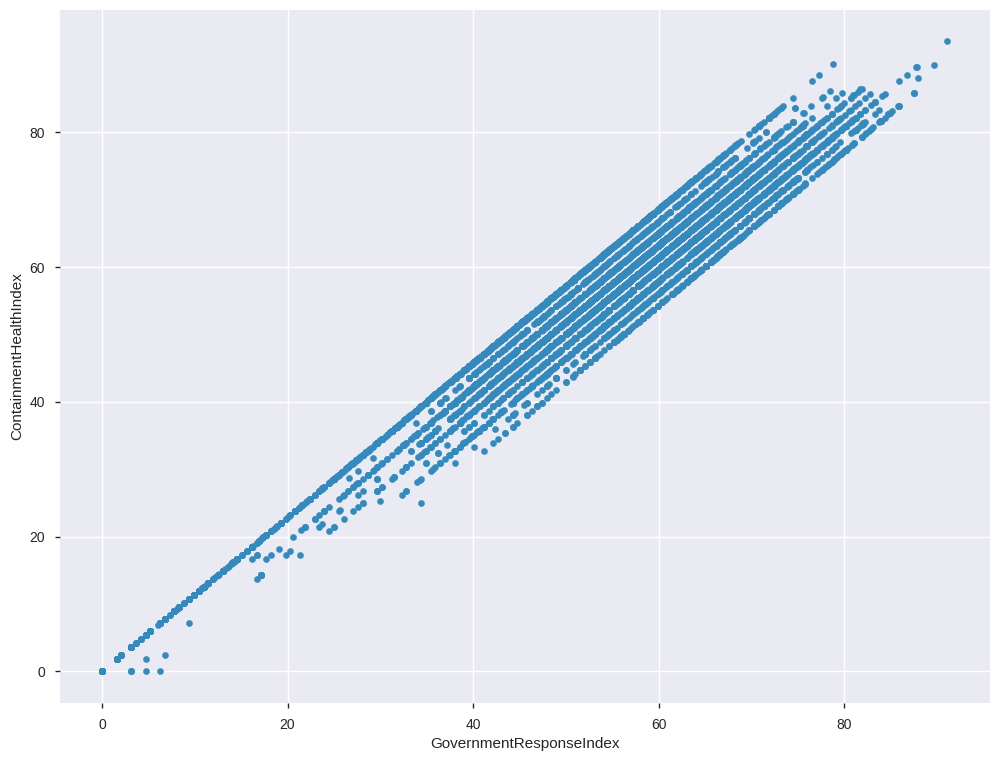

In [ ]:
#Boxplot
#Scatterplot
df_Integrado.plot.scatter(x= 'GovernmentResponseIndex', y='ContainmentHealthIndex')

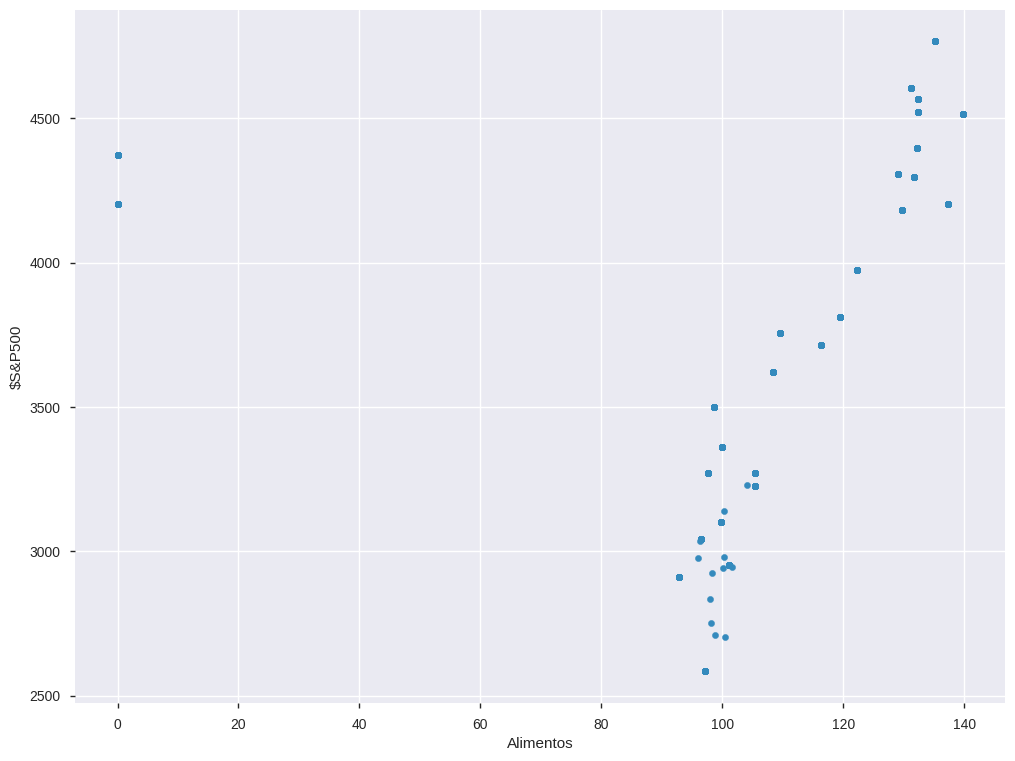

In [ ]:
#Boxplot
#Scatterplot
df_Integrado.plot.scatter(x= 'Alimentos', y='$S&P500')

In [ ]:
df_Integrado.groupby('Alimentos')['Industrial'].describe()

,count,mean,std,min,25%,50%,75%,max
Alimentos,,,,,,,,
0.000000,624.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
92.933630,312.0,108.406682,5.266463e-13,108.406682,108.406682,108.406682,108.406682,108.406682
96.053058,1.0,124.101686,NaN,124.101686,124.101686,124.101686,124.101686,124.101686
96.382200,1.0,121.736305,NaN,121.736305,121.736305,121.736305,121.736305,121.736305
96.516706,312.0,112.803065,5.551137e-13,112.803065,112.803065,112.803065,112.803065,112.803065
97.199983,312.0,113.212799,1.138695e-13,113.212799,113.212799,113.212799,113.212799,113.212799
97.635718,312.0,125.860440,3.843095e-13,125.860440,125.860440,125.860440,125.860440,125.860440
98.063110,1.0,127.539176,NaN,127.539176,127.539176,127.539176,127.539176,127.539176
98.094289,1.0,129.330578,NaN,129.330578,129.330578,129.330578,129.330578,129.330578


In [ ]:
%matplotlib inline
plt.close('all')

<Figure size 3000x2000 with 0 Axes>

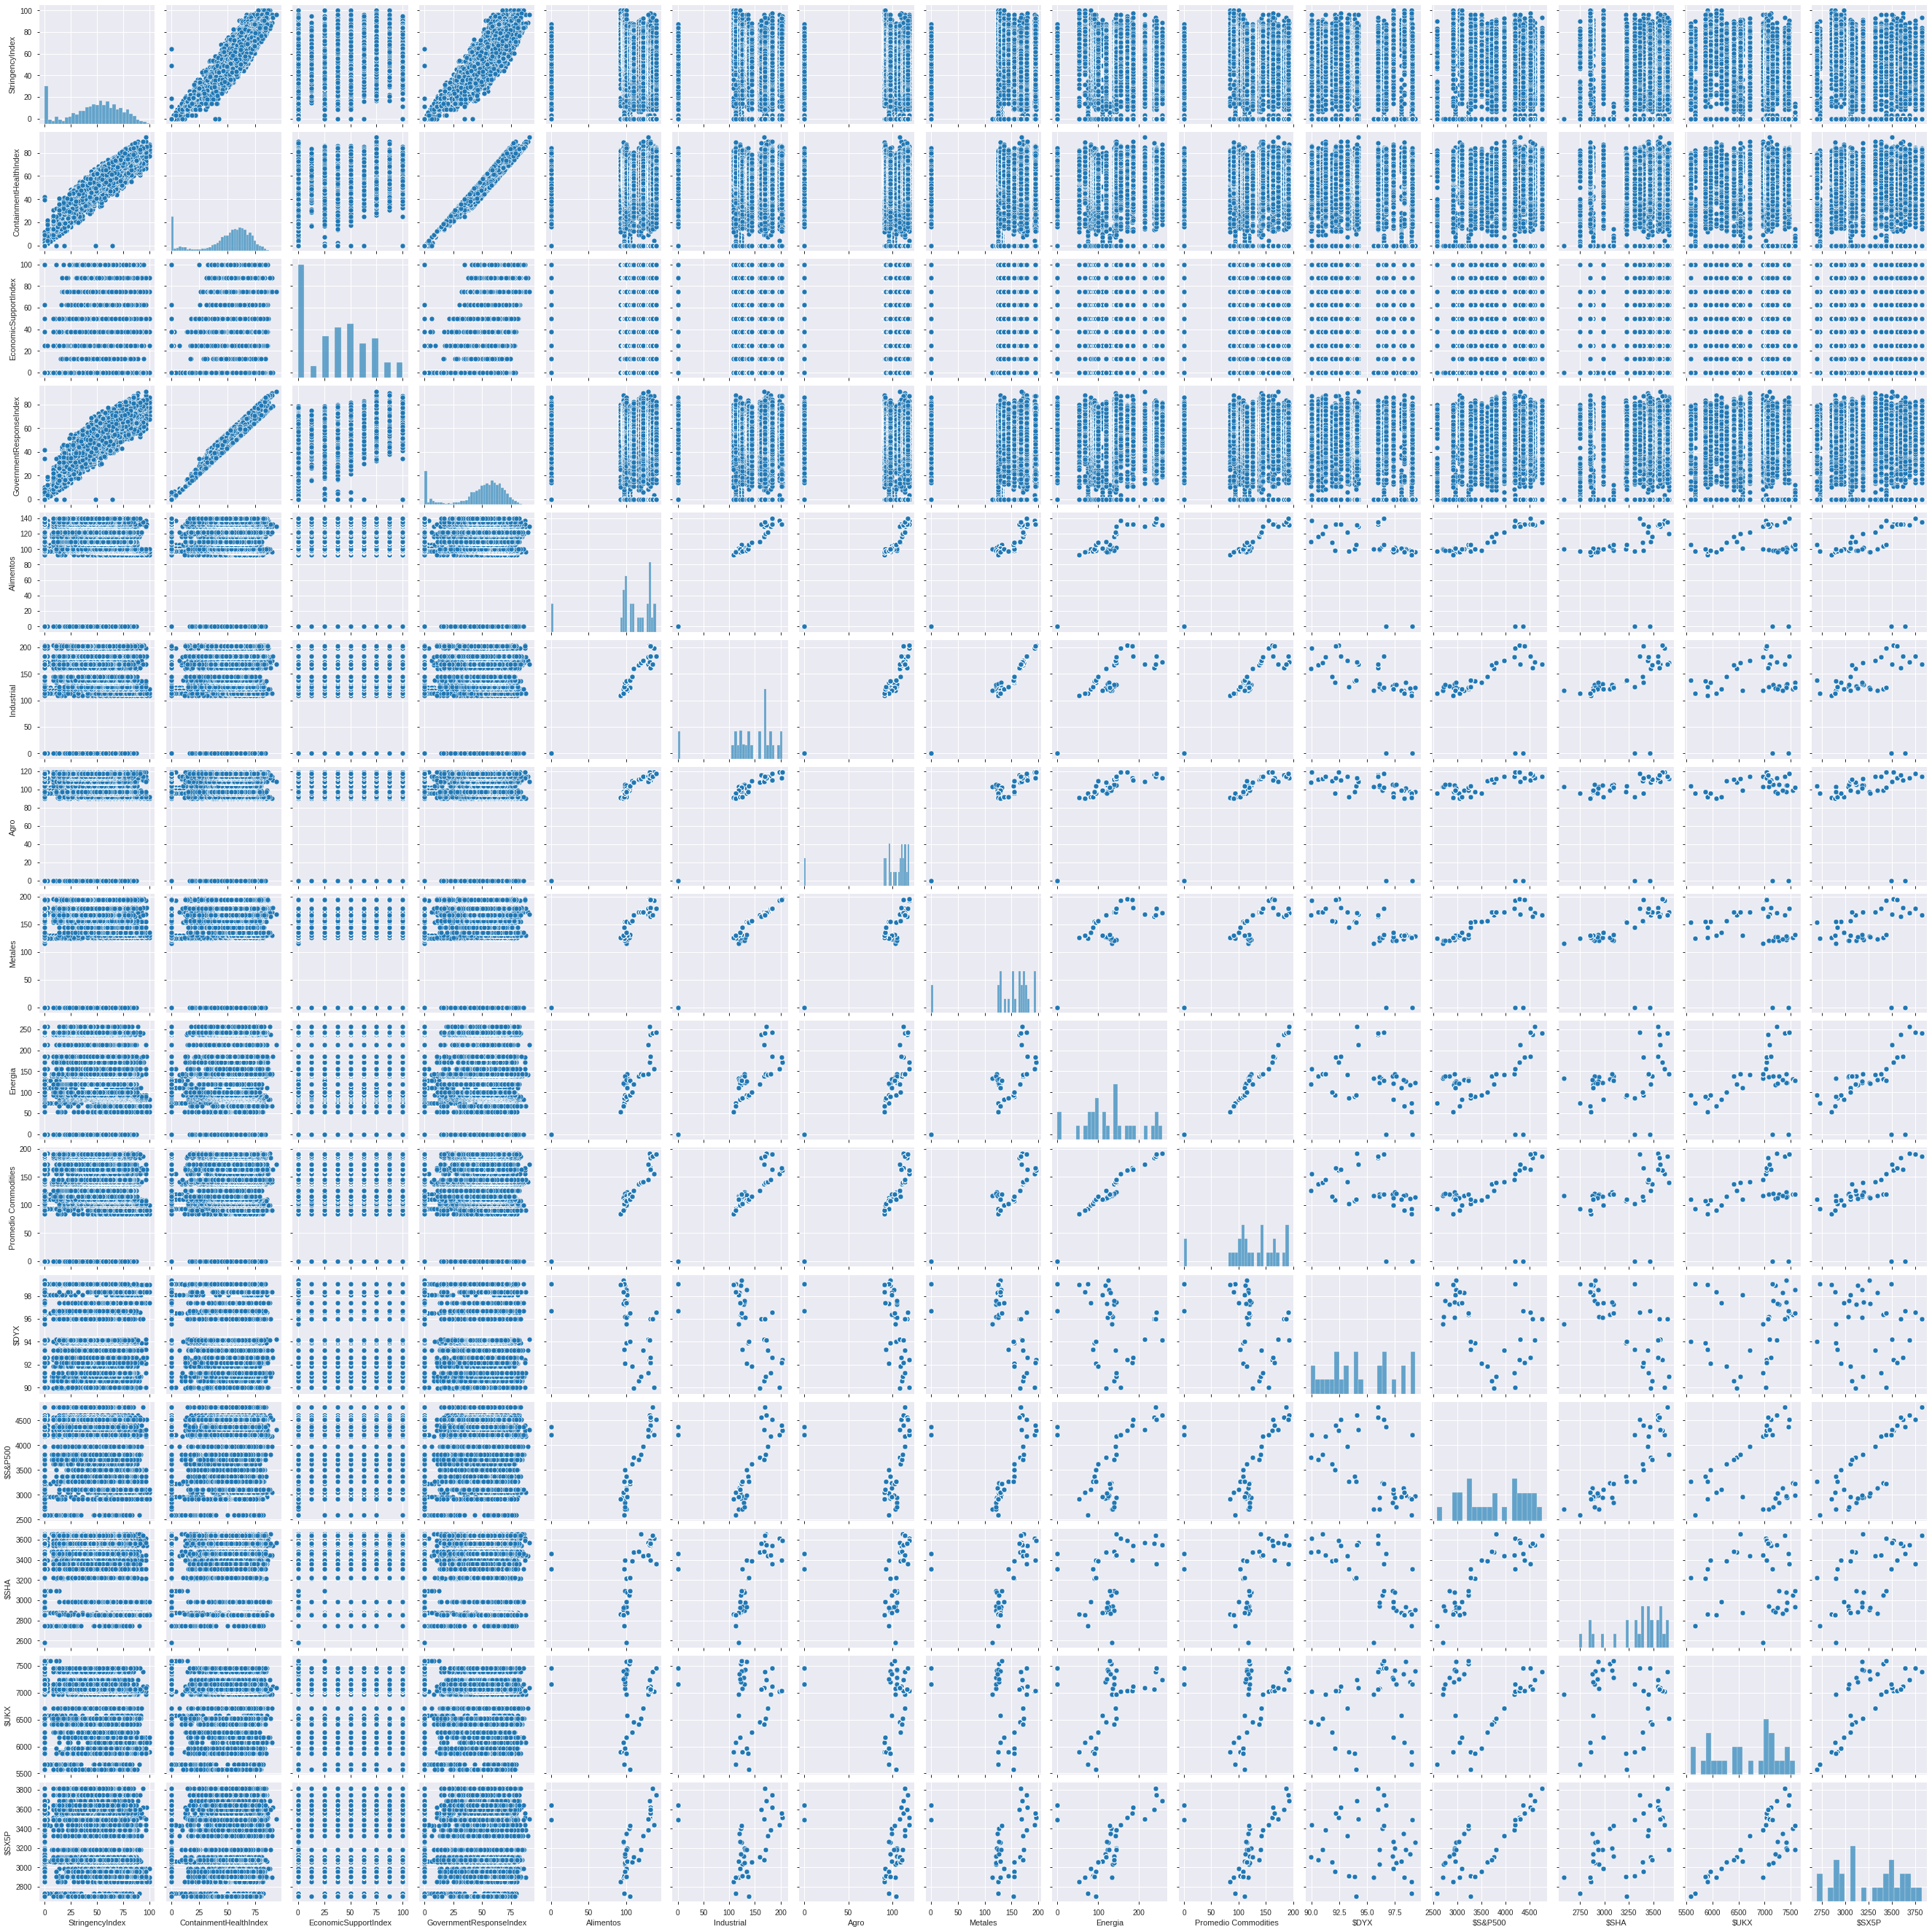

In [ ]:
#Crear un Pairplot del dataset
plt.figure(dpi=500)
sns.pairplot(df_Integrado)
plt.show()

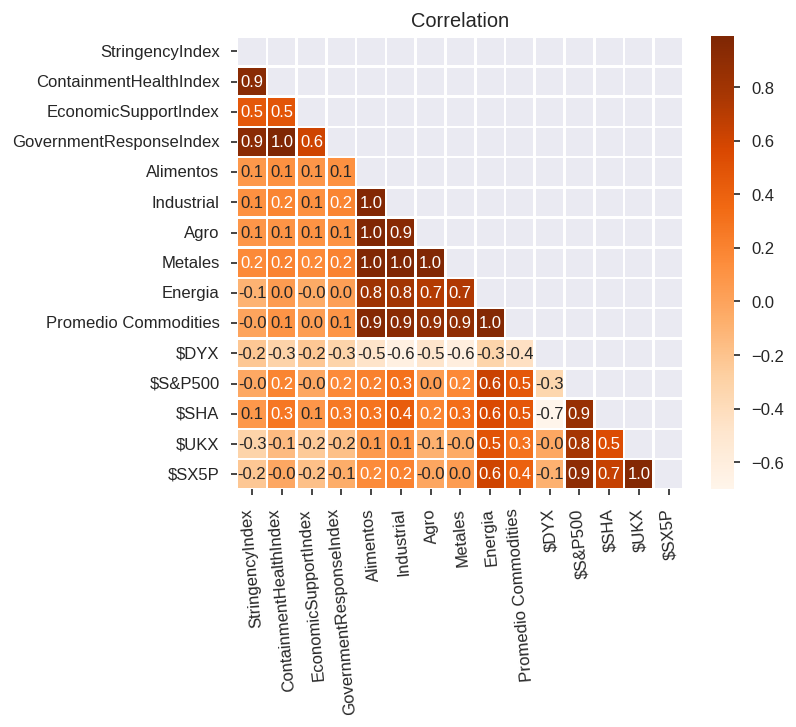

In [ ]:
#Correlaciones
plt.figure(dpi = 120,figsize= (6,5))
mask = np.triu(np.ones_like(df_Integrado.corr(),dtype = bool))
sns.heatmap(df_Integrado.corr(),mask = mask, fmt = ".1f",annot=True,lw=1,cmap = 'Oranges')
plt.yticks(rotation = 0)
plt.xticks(rotation = 95)
plt.title('Correlation')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


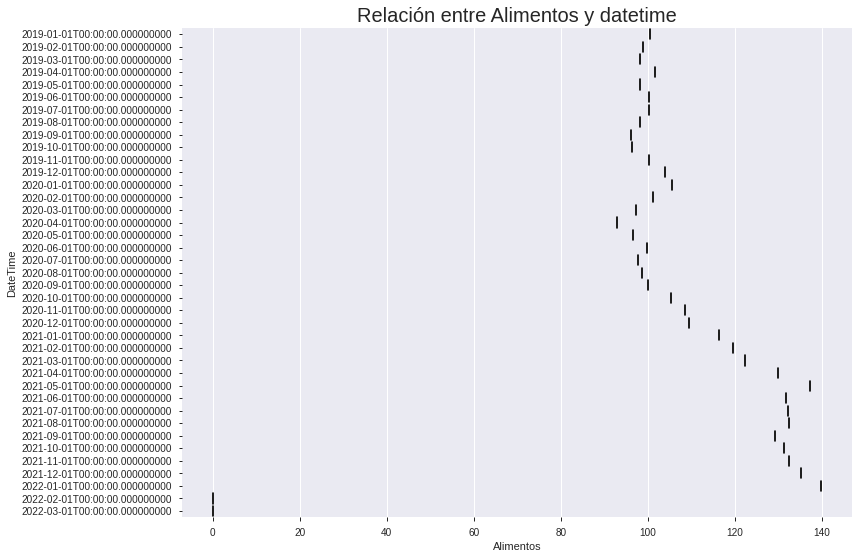

In [ ]:
# tresbps vs date time
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df_Integrado['Alimentos'], df_Integrado['DateTime'], palette = 'viridis')
plt.title('Relación entre Alimentos y datetime', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Relacion entre Alimentos y el sector industrial')

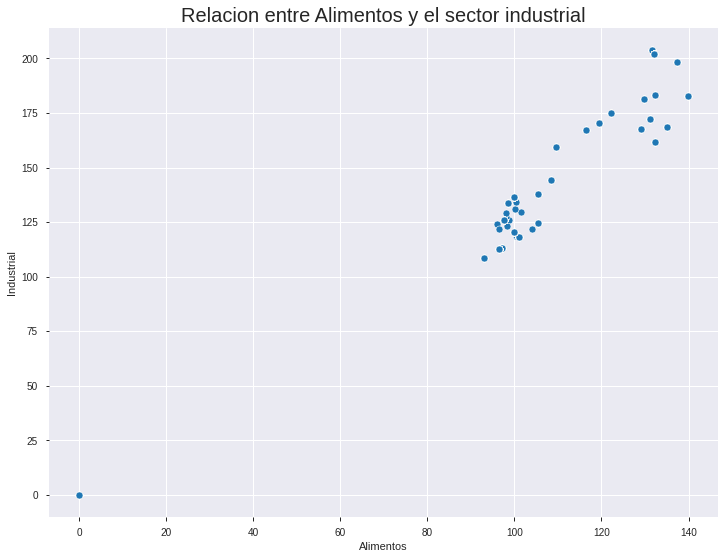

In [ ]:
sns.scatterplot(x="Alimentos", y="Industrial", data=df_Integrado)
plt.title('Relacion entre Alimentos y el sector industrial', fontsize = 20, fontweight = 30)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 10 Text major ticklabel objects>)

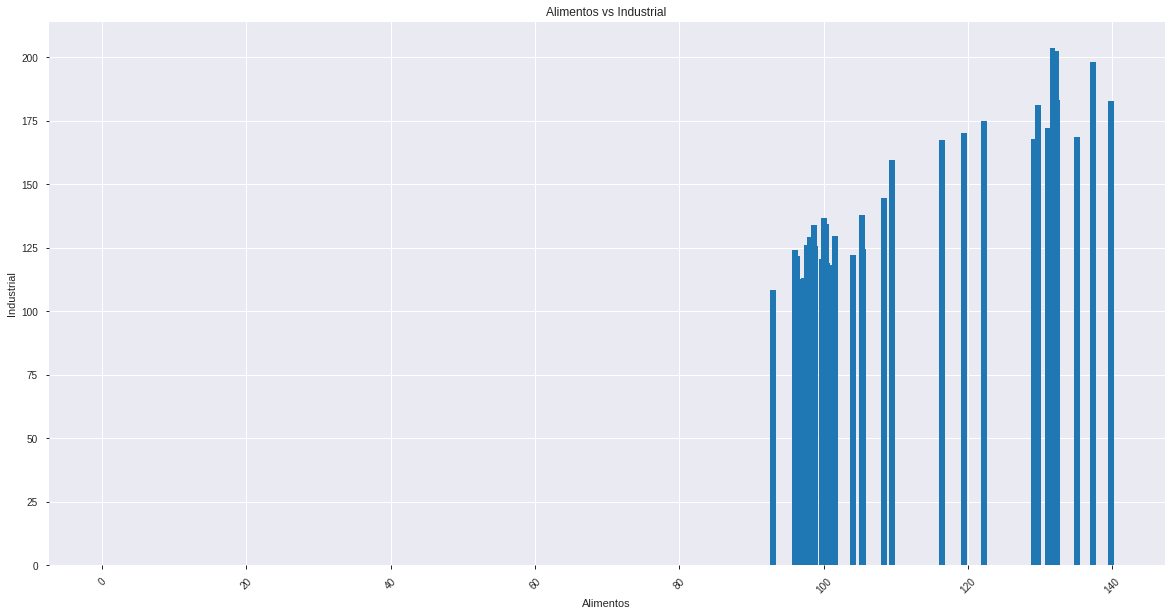

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('Alimentos')
ax.set_ylabel('Industrial')
ax.set_title('Alimentos vs Industrial')
ax.ticklabel_format(useOffset=False, style='plain')
ax.bar(df_Integrado['Alimentos'], df_Integrado['Industrial'])
plt.xticks(rotation=45)

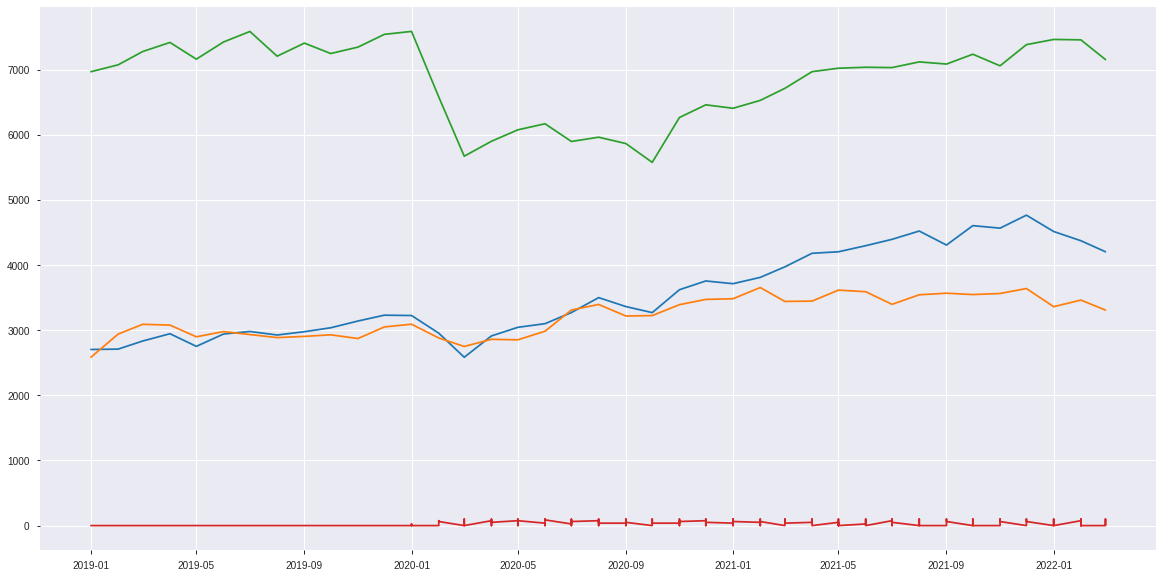

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_Integrado.DateTime, df_Integrado['$S&P500'])
ax.plot(df_Integrado.DateTime, df_Integrado['$SHA'])
ax.plot(df_Integrado.DateTime, df_Integrado['$UKX'])
ax.plot(df_Integrado.DateTime, df_Integrado['EconomicSupportIndex'])


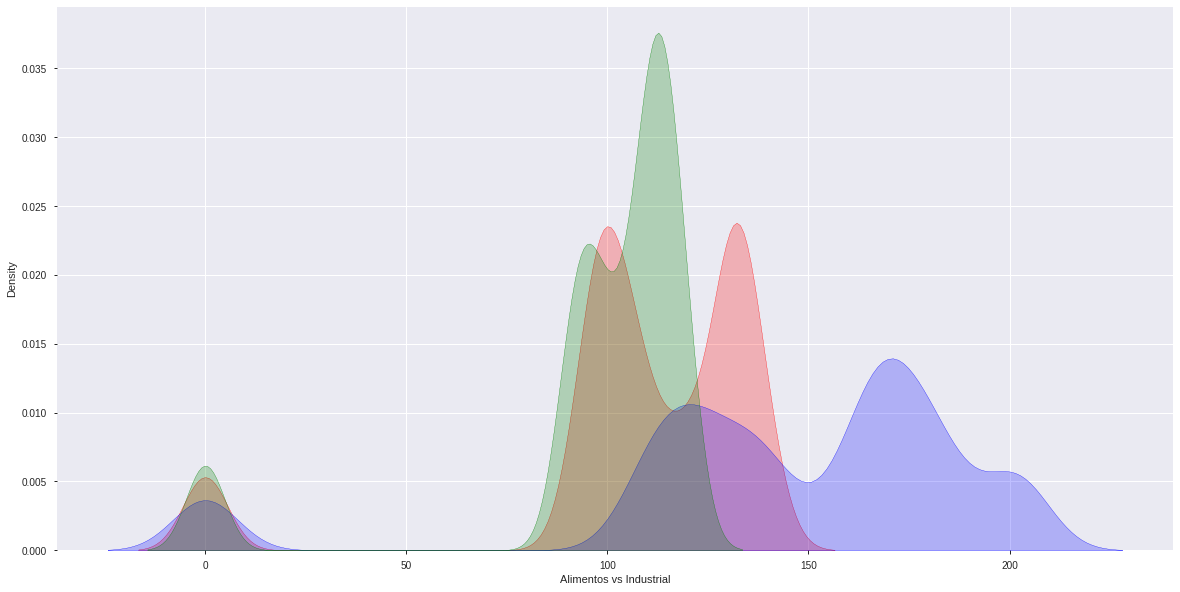

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.kdeplot(df_Integrado.Alimentos, label='Alimentos', shade=True, color='red')
sns.kdeplot(df_Integrado.Industrial, label='Industrial', shade=True, color='blue')
sns.kdeplot(df_Integrado.Agro, label='Agro', shade=True, color='green')

plt.xlabel('Alimentos vs Industrial');

In [ ]:
df_Integrado.groupby('Agro')['Industrial'].sum().sort_values(ascending=False)

Agro
119.085099    63571.139185
112.613753    63095.137045
118.889546    61828.629881
110.180505    57181.165273
117.708599    57048.023716
114.131176    56546.114259
114.474404    54588.530862
112.829024    53713.363389
111.696886    53119.411016
114.319145    52608.675090
108.462567    52372.447736
111.168747    52220.812385
116.294941    50396.754033
108.049126    49759.533963
109.395015    45046.926130
103.982065    42979.829720
97.428888     42635.342652
95.731299     41739.985380
92.363574     39268.457267
102.189213    38840.247438
92.046821     37663.819961
98.965873     36913.623548
95.850782     35322.393254
90.561779     35194.556338
91.334755     33822.884805
101.490499      134.433558
104.958595      130.989096
104.681017      129.656529
105.436360      129.330578
105.409046      127.539176
103.608780      125.808562
97.359429       124.101686
97.621066       123.198447
99.120569       122.086372
95.920179       121.736305
99.185988       119.009952
103.536150      118.836

In [ ]:
df_Integrado.groupby('CountryName').sum().sort_values(by='Alimentos', ascending=False)

,StringencyIndex,ContainmentHealthIndex,EconomicSupportIndex,GovernmentResponseIndex,Alimentos,Industrial,Agro,Metales,Energia,Promedio Commodities,$DYX,$S&P500,$SHA,$UKX,$SX5P
CountryName,,,,,,,,,,,,,,,
United States,61846.74,69998.35,58625.0,68572.31,150881.763244,201246.300721,138307.186448,208232.558758,184720.355174,177278.285439,132579.72,5358202.20,4683155.36,9344260.64,4584623.68
China,44743.05,50760.42,23550.0,47358.96,92850.315842,123843.877367,85112.114737,128143.113082,113674.064722,109094.329501,81587.52,3297355.20,2881941.76,5750314.24,2821306.88
Brazil,30438.96,29607.85,24725.0,28359.93,81244.026362,108363.392696,74473.100395,112125.223947,99464.806632,95457.538313,71389.08,2885185.80,2521699.04,5031524.96,2468643.52
Canada,21054.17,21325.64,14987.5,20528.82,40622.013181,54181.696348,37236.550197,56062.611973,49732.403316,47728.769157,35694.54,1442592.90,1260849.52,2515762.48,1234321.76
United Kingdom,7197.69,7391.22,9750.0,7685.97,14507.861850,19350.605839,13298.767928,20022.361419,17761.572613,17045.988985,12748.05,515211.75,450303.40,898486.60,440829.20
Kyrgyz Republic,1354.16,1275.17,1225.0,1268.90,2901.572370,3870.121168,2659.753586,4004.472284,3552.314523,3409.197797,2549.61,103042.35,90060.68,179697.32,88165.84
Palestine,1608.82,1375.62,300.0,1241.18,2901.572370,3870.121168,2659.753586,4004.472284,3552.314523,3409.197797,2549.61,103042.35,90060.68,179697.32,88165.84
New Zealand,1103.21,1214.16,1512.5,1251.49,2901.572370,3870.121168,2659.753586,4004.472284,3552.314523,3409.197797,2549.61,103042.35,90060.68,179697.32,88165.84
Nicaragua,252.75,396.04,75.0,355.88,2901.572370,3870.121168,2659.753586,4004.472284,3552.314523,3409.197797,2549.61,103042.35,90060.68,179697.32,88165.84
